In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%matplotlib inline

In [3]:
import pickle
import os

# trainset = []
# valset = []
# totledata = []
# totlelabel = []
# folder = '/kaggle/input/subtrainset8/subtrain_set'
# file_path = os.listdir(folder)
# print(file_path)
# for file in file_path:
#     with open(os.path.join(folder, file), 'rb') as f:
#         images = pickle.load(f)
#         labels = pickle.load(f)
# #         print(labels.shape)
#     images = np.squeeze(images)
#     totledata.append(images)
#     totlelabel.append(labels)
    
# x_train = totledata[1:]
# y_train = totlelabel[1:]
# x_test = totledata[0]
# y_test = totlelabel[0]



In [4]:
# x_train = np.concatenate(totledata, axis=0)
# y_train = np.concatenate(totlelabel, axis=0)

In [5]:
# x_train.shape

In [6]:
# with open(os.path.join('/kaggle/working/', 'trainset.pkl'), 'wb') as f:
#     pickle.dump(x_train, f)
#     pickle.dump(y_train, f)

In [7]:
with open('/kaggle/input/newdataset3/trainset.pkl', 'rb') as f:
    x_train = pickle.load(f)
    y_train = pickle.load(f)

In [8]:
with open('/kaggle/input/newdataset3/testset.pkl', 'rb') as f:
    x_test = pickle.load(f)
    y_test = pickle.load(f)

In [9]:
print(x_train.shape)
print(x_test.shape)


(152652, 68)
(3999, 68)


In [10]:
from sklearn.utils.class_weight import compute_class_weight
class_weight = 'balanced'
classes = np.array([0, 1, 2, 3, 4, 5, 6, 7])
weight = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
print(weight)

[0.62871499 0.35489901 0.9368372  1.36296429 3.02880952 5.02144737
 0.9368372  5.15716216]


In [11]:
weight[1] = weight[1]*0.6
weight[0] = weight[0]*0.8
weight[6] = weight[6]*0.8
print(weight)

[0.50297199 0.2129394  0.9368372  1.36296429 3.02880952 5.02144737
 0.74946976 5.15716216]


In [12]:
# class_balance = {0:1, 1:0.7, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1}
class_balance = {classes[i]: weight[i] for i in range(len(classes))}
print(class_balance)

{0: 0.5029719934102141, 1: 0.2129394040843656, 2: 0.9368371956009427, 3: 1.3629642857142856, 4: 3.0288095238095236, 5: 5.021447368421053, 6: 0.7494697564807542, 7: 5.157162162162162}


In [13]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svm', LinearSVC(max_iter=20000, class_weight=class_balance))
])

In [14]:
svc = LinearSVC()

# Set up parameter grid for GridSearchCV
param_grid = {
    'svm__C': [0.1, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Parameters: {'svm__C': 1}
Best Cross-Validation Score: 0.30373660217856147


In [15]:
# best_svc = LinearSVC(C=best_params['C'], max_iter=10000, class_weight='balanced')

# scores = cross_val_score(best_svc, new_train, y_train, cv=5)

# print("Cross-Validation Scores:", scores)

# # Calculate and print the mean and standard deviation of the scores
# print("Mean Score:", np.mean(scores))
# print("Standard Deviation:", np.std(scores))

# best_svc.fit(x_train, y_train)

# Predict on the test set
y_pred = grid_search.predict(x_test)
# Calculate accuracy on the test set
# accuracy = accuracy_score(y_test, y_pred)
# print("Test Set Accuracy:", accuracy)

In [16]:

with open(os.path.join('/kaggle/working/', 'lndbestmodel.pkl'), 'wb') as f:
    pickle.dump(grid_search, f)

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

In [18]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.22405601400350086
Precision: 0.2207444023768514
Recall: 0.22405601400350086
F1-Score: 0.2082655569674205


In [19]:
# # Calculate ROC curve and AUC
# y_scores = best_svc.decision_function(new_test)
# roc_auc = roc_auc_score(y_test, y_scores)

In [20]:
# # Plot ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

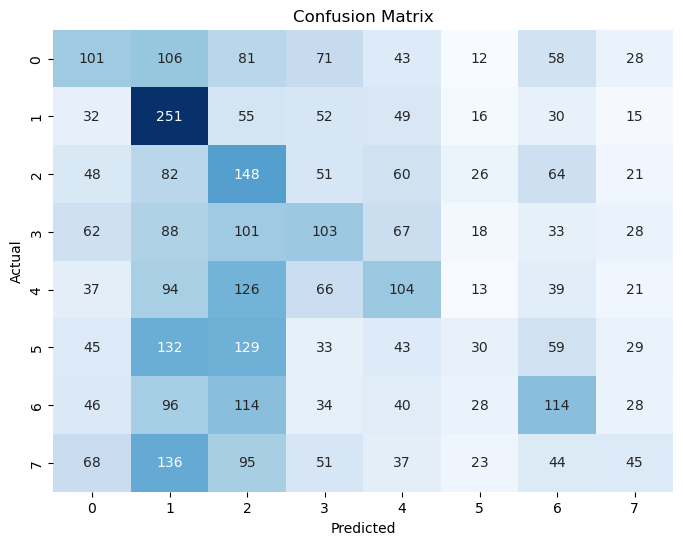

In [21]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()